In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import matplotlib.pyplot as plt

# prepare data

In [2]:
trainset = datasets.CIFAR10(root='cifar', train=True, download=True) #download cifar dataset
trans = transforms.ToTensor()

labels = []
for i in range(100):
    labels.append(int(trainset[i][1]))    
    torch.save(trans(trainset[i][0]), 'images/' + str(i)+'.pt')
df = pd.DataFrame()
df['target']= labels
df.to_csv('df.csv', index=False)


94.8%

Extracting cifar\cifar-10-python.tar.gz to cifar


# custom dataset

In [3]:
class CustomDataset(Dataset):    
    def __init__(self, df):        
        self.df = df
            
    def __len__(self):
        return len(self.df)
        
    def __getitem__(self, idx):                 
        x = torch.load('images/' + str(idx) + '.pt')
        y = int(df.target.loc[idx])
        return x, y

#  get singe example

x.shape torch.Size([3, 32, 32])
truck


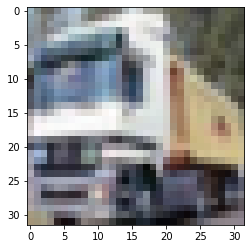

In [4]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')  
df = pd.read_csv('df.csv')
dataset = CustomDataset(df)

# get single img+label pair
i = 1
x, y = dataset[i]
print('x.shape', x.shape)
print(classes[y])
plt.imshow(x.transpose(0,1).transpose(1,2))

# get minibatch

x.shape torch.Size([4, 3, 32, 32])
y.shape torch.Size([4])
bird


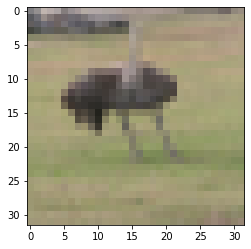

In [5]:
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=0) # set more workers for speed
x, y = next(iter(dataloader))
print('x.shape', x.shape)
print('y.shape', y.shape)

i = 1
print(classes[y[i]])
plt.imshow(x[i].transpose(0,1).transpose(1,2))